In [1]:
# Importig Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
data = pd.read_csv('gas_turbines.csv')

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.shape

(15039, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
# Changing position of target column 'TEY'
Target = data['TEY']
#Drop the existing column
data.drop(labels=['TEY'], axis=1,inplace = True)
data.insert(0, 'Y', Target)

data = data.rename({'Y':'TEY'}, axis = 1)

data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [7]:
data.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [8]:
data.isnull().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


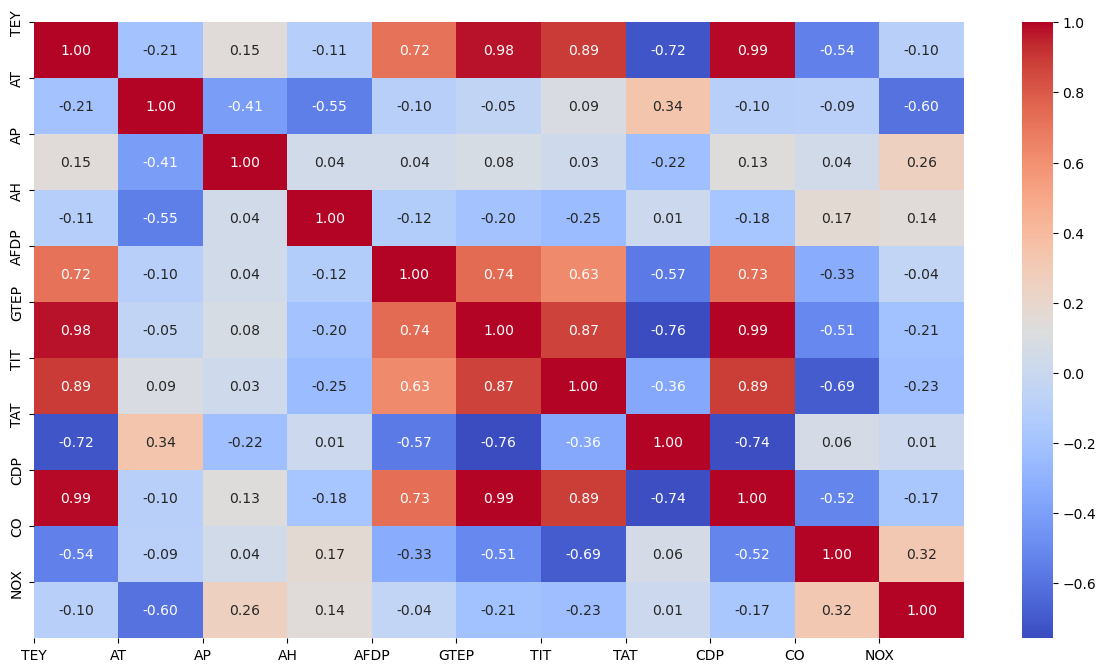

In [10]:
# Heatmap of correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


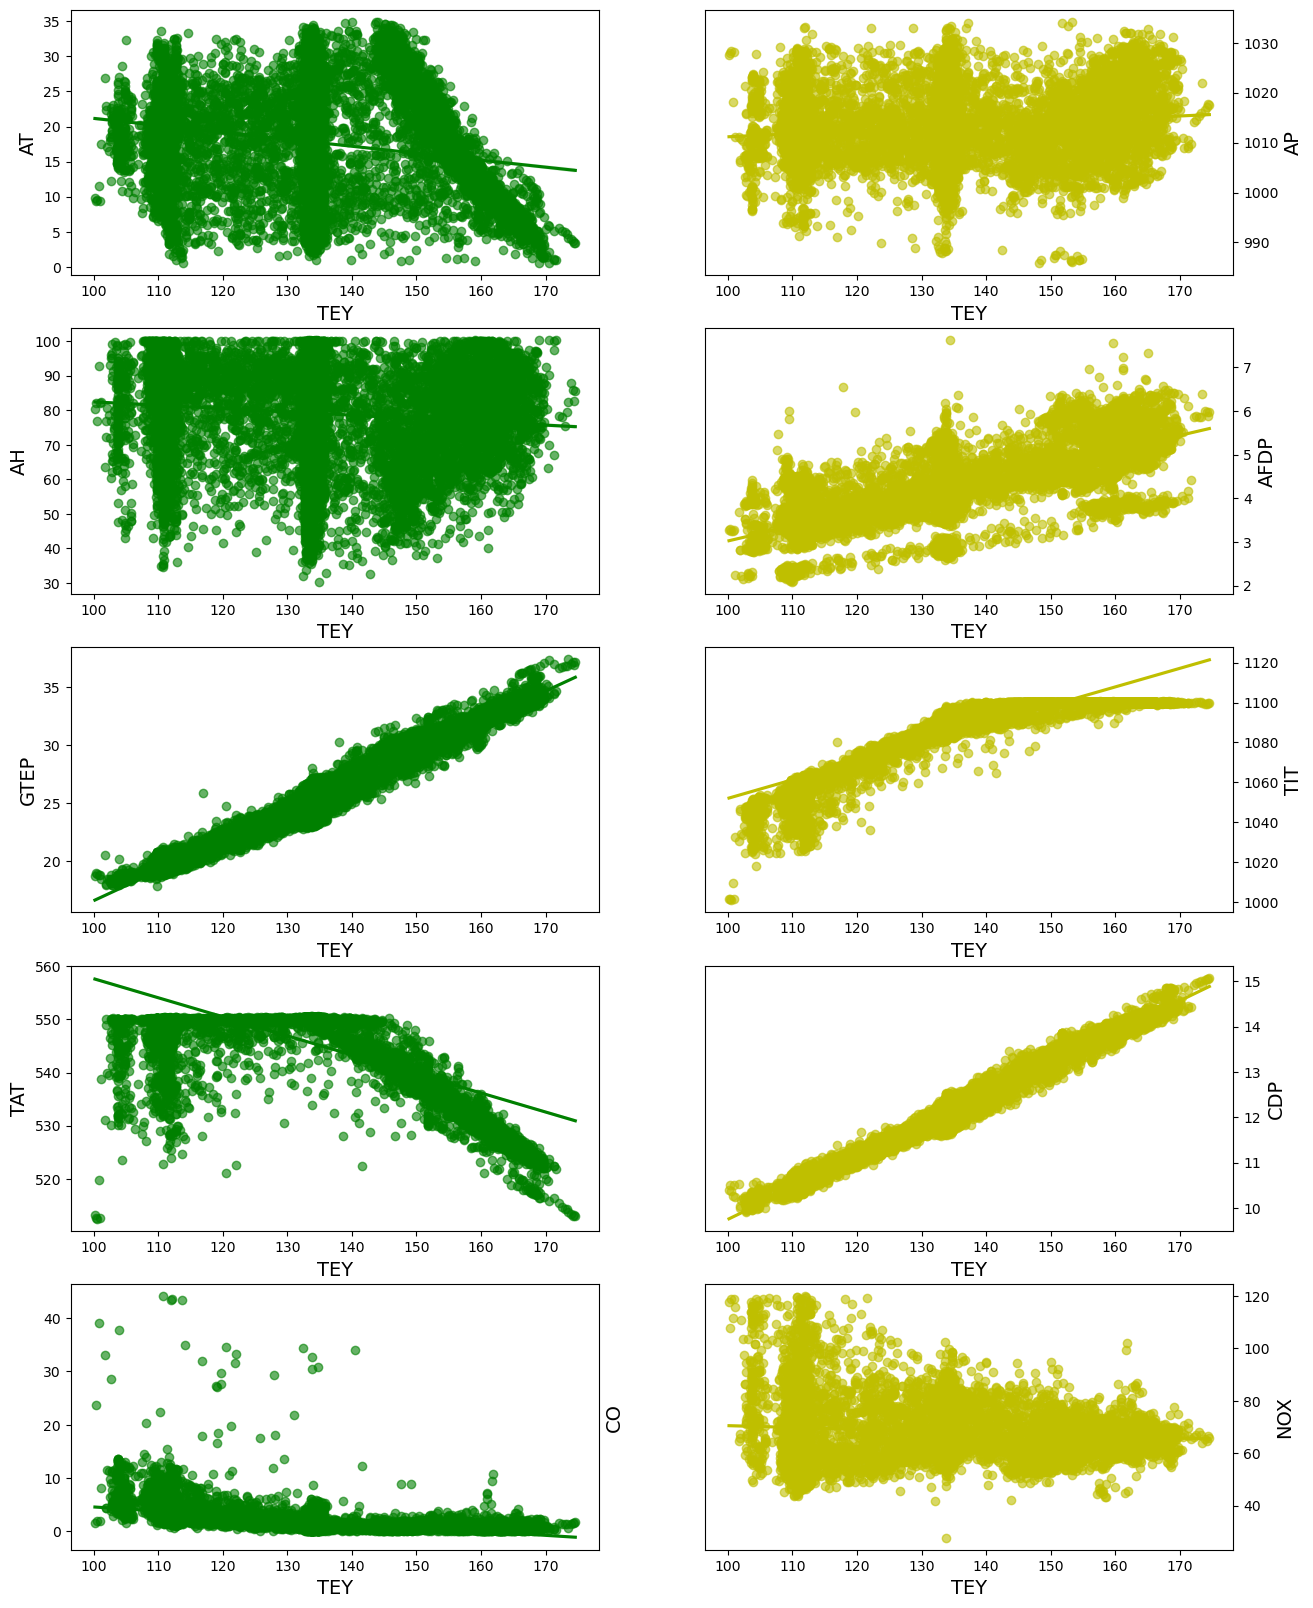

In [11]:
# plot regplots  for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight against TEY 
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()



sns.regplot(x = 'TEY', y = 'GTEP', data = data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = data, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = data, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = data, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'CO', data = data, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")


sns.regplot(x = 'TEY', y = 'NOX', data = data, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

# Feature selection by using mutual information feature selection

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Feature 0: 0.403095
Feature 1: 0.148017
Feature 2: 0.090834
Feature 3: 0.656896
Feature 4: 1.591685
Feature 5: 1.304177
Feature 6: 0.911894
Feature 7: 1.712044
Feature 8: 0.506598
Feature 9: 0.303150


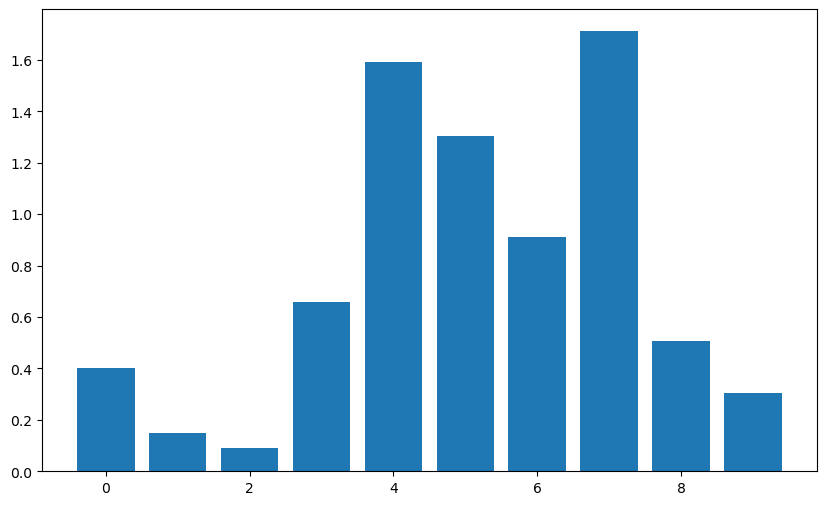

In [13]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [14]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data.iloc[:,0]

# Standardizing the data

In [15]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)

StandardScaler()

In [16]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [17]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


# Artificial Neural Network Using Backpropagation

In [18]:
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=40)




Epoch 1/100


264/264 [==============================] - 2s 3ms/step - loss: 1.0676 - mse: 1.0676
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9943 - mse: 0.9943
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9942 - mse: 0.9942
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9940 - mse: 0.9940
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9940 - mse: 0.9940
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9938 - mse: 0.9938
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9940 - mse: 0.9940
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9942 - mse: 0.9942
Epoch 10/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9939 - mse: 0.9939
Epoch 11/100
264/264 [============

264/264 [==============================] - 1s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 75/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9933 - mse: 0.9933
Epoch 76/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9928 - mse: 0.9928
Epoch 77/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9935 - mse: 0.9935
Epoch 78/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9933 - mse: 0.9933
Epoch 79/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9930 - mse: 0.9930
Epoch 80/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9932 - mse: 0.9932
Epoch 81/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9938 - mse: 0.9938
Epoch 82/100
264/264 [==============================] - 1s 3ms/step - loss: 0.9932 - mse: 0.9932
Epoch 83/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9934 - mse: 0.9934
Epoch 84/100
264/264 [=====================

In [19]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 1s 2ms/step - loss: 1.0179 - mse: 1.0179
mse


# Artificial Neural Network model- Tunning of all Hyperparameter

In [20]:
pip install keras==2.12.0

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from keras.layers import Dropout

X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data.iloc[:,0] 

# Selecting first 500 records
X = X.iloc[0:500,:]

#  Selecting first 500 records
y = y.iloc[0:500] 

# Scaling all the features
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-1.759902,-1.532845,-2.140879,0.597669,-1.637742
1,-1.760236,-1.516668,-2.132865,0.597669,-1.644533
2,-1.789273,-1.503977,-2.124851,0.584370,-1.641623
3,-1.792443,-1.500741,-2.108824,0.596646,-1.636771
4,-1.763907,-1.507461,-2.100811,0.595623,-1.630950
...,...,...,...,...,...
495,0.427695,0.194256,-0.706435,-0.594154,-0.072722
496,-1.244251,-1.463412,-3.919909,-0.777275,-1.760964
497,-1.300155,-1.463661,-3.984018,-0.855025,-1.660057
498,-1.030481,-1.114010,-3.463131,-0.919476,-1.255462


In [22]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (350, 5)
Shape of x_test:  (150, 5)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

C:\Users\HP\AppData\Local\Temp\ipykernel_12760\1036735411.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=

[CV 1/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 6/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 6/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 6/256] END activation_functi

[CV 2/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 11/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 11/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 11/256] END activation

[CV 3/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 16/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 17/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 17/256] END activation_fu

[CV 4/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 21/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 21/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 22/256] END acti

[CV 1/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 27/256] END acti

[CV 3/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 33/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 33/256] END activatio

[CV 5/5; 37/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 38/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 38/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 38/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 38/256] END activation

[CV 2/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 43/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 43/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 43/256] END activation

[CV 1/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 49/256] EN

[CV 5/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 55/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 55/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 55/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 55/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 55/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 55/256] END acti

[CV 2/5; 60/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 60/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 60/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 60/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 60/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 60/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 60/256] END acti

[CV 4/5; 65/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 65/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 65/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 66/256] END acti

[CV 2/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 71/256] END activation

[CV 5/5; 76/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 77/256] END activation_func

[CV 1/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 82/256] EN

[CV 4/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 88/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 88/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 88/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 88/256] END acti

[CV 2/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.1s
[CV 4/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 93/256] END activation

[CV 1/5; 99/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 99/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 99/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 99/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 99/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 99/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 99/256] END acti

[CV 4/5; 104/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 104/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 104/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 105/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 105/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 105/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 105/256] END act

[CV 1/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 110/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 110/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 110/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 110/256] END activatio

[CV 5/5; 115/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 116/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 116/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 116/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 116/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 116/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 116/

[CV 3/5; 121/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 121/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 121/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 121/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 121/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 122/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 122/256] E

[CV 4/5; 126/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 126/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 126/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 127/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 127/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 127/256] END act

[CV 4/5; 131/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 131/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 131/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5

[CV 1/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 137/

[CV 3/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 143/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 143/256] E

[CV 5/5; 147/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 148/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 148/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 5/5; 152/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 153/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 153/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5

[CV 2/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 158/

[CV 4/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 164/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 164/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 164/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5

[CV 2/5; 169/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 169/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 169/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 169/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 169/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 169/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 169/

[CV 3/5; 174/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 174/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 174/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 174/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 174/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 175/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 175/256] E

[CV 5/5; 179/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 180/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 180/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 180/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 180/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 180/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 3/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 185/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 185/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 186/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5

[CV 4/5; 190/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 190/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 190/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 191/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 191/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 191/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 191/

[CV 2/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 196/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 196/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 196/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 196/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5

[CV 4/5; 201/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 201/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 201/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 202/

[CV 4/5; 206/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 206/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 206/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 207/256] E

[CV 4/5; 211/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 211/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 211/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 2/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5

[CV 4/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 222/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 223/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 223/

[CV 1/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5

[CV 5/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 234/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 234/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 234/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 234/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 234/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 234/

[CV 2/5; 239/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 239/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 239/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 239/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 239/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 239/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 239/256] E

[CV 5/5; 244/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 245/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 245/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 245/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 245/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 245/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/

[CV 3/5; 250/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 250/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 250/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 250/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 250/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 251/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5

[CV 3/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 255/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 255/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 256/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 256/

ValueError: 
All the 1280 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_12760\1036735411.py", line 9, in create_model
    adam=adam.Adam(learning_rate = learning_rate)
UnboundLocalError: local variable 'adam' referenced before assignment


In [25]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam.Adam(learning_rate = 0.01)

# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

Epoch 1/50
18/18 [==============================] - 1s 3ms/step - loss: 1.0023 - mse: 1.0023
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9998 - mse: 0.9998
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9996 - mse: 0.9996
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0000 - mse: 1.0000
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9995 - mse: 0.9995
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0006 - mse: 1.0006
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9993 - mse: 0.9993
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 1.0001 - mse: 1.0001
Epoch 11/50
18/18 [==============================] - 0s 3ms/step - lo